# Solution

## Explanation

In this notebook we will work with the [Titanic Data Set](https://www.kaggle.com/c/titanic). We will perform Feature Engineering first and after that, we will train a logistic regression model to predict a classification- survival or deceased model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

## Load Data

Load the 'titanic_train.csv' dataset

In [2]:
df = pd.read_csv('titanic_train.csv')

### 1. EDA

**Print the first columns**

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Print the shape**

In [4]:
df.shape

(891, 12)

**Print column type**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Print NaN values**

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**As we have NaN values for 'Age' column, input the values based on the class they belong**

In [7]:
df.groupby(["Pclass"])["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [8]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 29

        else:
            return 25

    else:
        return Age

In [9]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

**Check again NaN Values and drop nan values if there are**

In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.dropna(inplace=True)

### 2. Feature Engineering

**Apply Get Dummies to 'Sex' and 'Embarked' columns and use the argument drop_first=True**

In [12]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)


# Concat the columns created when applying get_dummmies
df_clean = pd.concat([df,sex,embark],axis=1)

# Visualize data
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,1


**Create a column with the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature**

*__HINT__ Title always end with a dot (.) may be [this](https://www.w3schools.com/python/ref_string_endswith.asp) can be helpful*


In [13]:
def extract_title(name):
    for part in name.split():
        if part.endswith('.'):
            return part.replace('.', '')
    return ""

df_clean['title'] = df_clean['Name'].apply(extract_title)

df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,Mrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,Mrs
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1,Mr
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1,Miss
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,1,Miss


**Create a feature with the Cabin letter**

In [14]:
df_clean["cabin_letter"] = df_clean["Cabin"].apply(lambda x: x[0])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


**Use get_dummies function to encode the new 2 columns**

In [15]:
title = pd.get_dummies(df_clean['title'],drop_first=True)
cabin = pd.get_dummies(df_clean['cabin_letter'],drop_first=True)


# Concat the columns created when applying get_dummmies
df_final = pd.concat([df_clean,title,cabin],axis=1)

# Visualize data
df_final.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,title,cabin_letter,Col,Countess,Dr,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Sir,B,C,D,E,F,G,T
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,Mrs,C,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,Mrs,C,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1,Mr,E,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1,Miss,G,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,1,Miss,C,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [16]:
# Drop 'Sex','Embarked','Name','Ticket','Cabin' columns and be sure all columns are numerical
df_final.drop(['Sex','Embarked','Name','Ticket','Cabin','cabin_letter','title'],axis=1,inplace=True)

df_final.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Col,Countess,Dr,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Sir,B,C,D,E,F,G,T
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6,7,0,1,54.0,0,0,51.8625,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
10,11,1,3,4.0,1,1,16.7000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
11,12,1,1,58.0,0,0,26.5500,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
21,22,1,2,34.0,0,0,13.0000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
23,24,1,1,28.0,0,0,35.5000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
27,28,0,1,19.0,3,2,263.0000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
31,32,1,1,38.0,1,0,146.5208,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
52,53,1,1,49.0,1,0,76.7292,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


### 3. Train Model

**Determine wich columns are predictors (X) and which the target (y)**

In [18]:
X = df_final.drop(columns=['Survived'],axis=1)

y = df_final['Survived']

**Split the dataset into train and test sets (80/20) and random_state=101**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.20, 
                                                    random_state=101)

**Train the model**

In [20]:
logmodel = LogisticRegression(max_iter=1000)

logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Evaluation

In [21]:
# Get predictions using test dataset
predictions = logmodel.predict(X_test)

# Print report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.87      0.96      0.91        27

    accuracy                           0.88        41
   macro avg       0.89      0.84      0.86        41
weighted avg       0.88      0.88      0.87        41



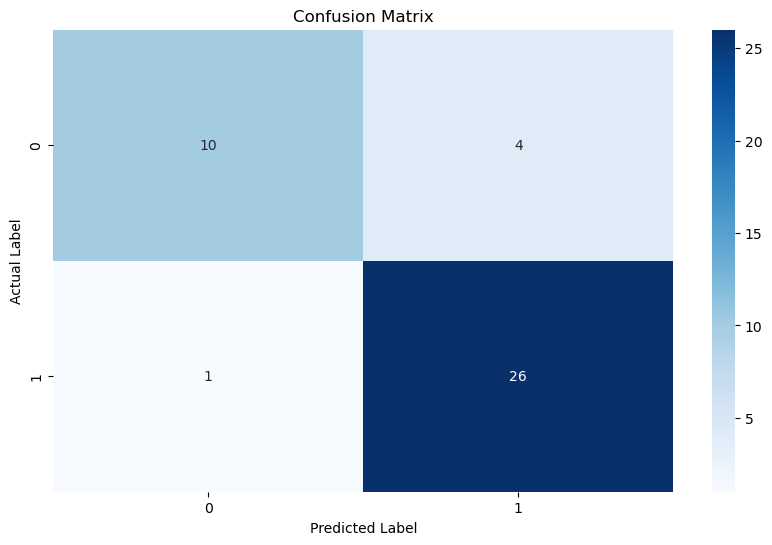

In [22]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## How to Interpret a Confusion Matrix

A confusion matrix is a visualization tool typically used in supervised learning to measure the performance of a classification algorithm. Here is a guide on how to interpret a confusion matrix:

### Key Components:

- **True Positives (TP)**: The number of correct positive predictions. In the provided matrix, TP is 37.

- **True Negatives (TN)**: The number of correct negative predictions. Here, TN is 13.

- **False Positives (FP)**: The number of incorrect positive predictions (Type I error). In the matrix, FP is 7.

- **False Negatives (FN)**: The number of incorrect negative predictions (Type II error). The matrix shows FN as 4.

### Derived Metrics:

- **Accuracy**: Measures the proportion of true results (both true positives and true negatives) in the total data set. `(TP + TN) / (Total)`

- **Precision**: Indicates the proportion of positive identifications that were actually correct. `TP / (TP + FP)`

- **Recall (Sensitivity)**: Measures the proportion of actual positives that were identified correctly. `TP / (TP + FN)`

- **Specificity**: Measures the proportion of actual negatives that were identified correctly. `TN / (TN + FP)`

- **F1 Score**: The weighted average of Precision and Recall. `2 * (Precision * Recall) / (Precision + Recall)`

### Interpretation Guide for Students:

1. **Identify Elements**: Start by identifying the TP, TN, FP, and FN in your confusion matrix.

2. **Calculate Metrics**: Using the definitions provided, calculate the accuracy, precision, recall, specificity, and F1 score for your model.

3. **Model Performance**: Evaluate the model's performance based on these metrics. High values for precision and recall suggest a better performing model.

4. **Balance Evaluation**: Consider the trade-off between precision and recall. An F1 score can help you understand the balance between these two metrics.

By following this guide, you can determine the efficacy of your classification model and understand the implications of its performance in practical applications.
